# ARTIFICIAL NEURAL NETWORK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CO2.csv')

del df['Model Year']
del df['Make']
del df['Model']
del df['Vehicle Class']
del df['Smog Rating']
del df['Transmission']

df = df.rename({'Engine Size(L)': 'Engine_Size','Fuel Type':'Fuel_Type','Fuel Consumption (City (L/100 km)':'Fuel_Consumption_City',
                'Fuel Consumption(Hwy (L/100 km))':'Fuel_Consumption_Higway','Fuel Consumption(Comb (mpg))':'Fuel_Consumption_miles',
                'CO2 Emissions(g/km)':'CO2_Emission_KM','CO2 Rating':'CO2_Rating','Fuel Consumption(Comb (L/100 km))':'Fuel_Consumption_km'}, axis=1) 

df.head()

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Higway,Fuel_Consumption_km,Fuel_Consumption_miles,CO2_Emission_KM,CO2_Rating
0,2.4,4,Z,9.9,7.0,8.6,33,200,6
1,3.5,6,Z,12.6,9.4,11.2,25,263,4
2,2.0,4,Z,11.0,8.6,9.9,29,232,5
3,2.0,4,Z,11.3,9.1,10.3,27,242,5
4,2.0,4,Z,11.2,8.0,9.8,29,230,5


In [3]:
df.drop(df.index[df['CO2_Rating'] == 10], inplace=True)
df.drop(df.index[df['CO2_Rating'] == 1], inplace=True)
df.drop(df.index[df['CO2_Rating'] == 8], inplace=True)
df.drop(df.index[df['CO2_Rating'] == 9], inplace=True)
df.drop(df.index[df['CO2_Rating'] == 2], inplace=True)
df.drop(df.index[df['CO2_Rating'] == 7], inplace=True)

In [4]:
df['CO2_Rating'] = df['CO2_Rating'].map({3:1,4:2,5:3,6:4})

In [5]:
df=df.dropna()

In [6]:
df['CO2_Rating'].value_counts()

CO2_Rating
3    266
2    228
1    189
4    113
Name: count, dtype: int64

In [7]:
df.columns

Index(['Engine_Size', 'Cylinders', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Higway', 'Fuel_Consumption_km',
       'Fuel_Consumption_miles', 'CO2_Emission_KM', 'CO2_Rating'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Fuel_Type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.head()

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Higway,Fuel_Consumption_km,Fuel_Consumption_miles,CO2_Emission_KM,CO2_Rating
0,2.4,4,3,9.9,7.0,8.6,33,200,4
1,3.5,6,3,12.6,9.4,11.2,25,263,2
2,2.0,4,3,11.0,8.6,9.9,29,232,3
3,2.0,4,3,11.3,9.1,10.3,27,242,3
4,2.0,4,3,11.2,8.0,9.8,29,230,3


In [10]:
x1 = df.drop(labels='CO2_Rating', axis=1)
y1 = df.loc[:,'CO2_Rating']

In [11]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({3: 266, 2: 228, 1: 189, 4: 113})
OVER SAMPLING DATA COUNT  :  Counter({4: 266, 2: 266, 3: 266, 1: 266})


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  851
NUMBER OF TEST DATASET      :  213
TOTAL NUMBER OF DATASET    :  1064


In [13]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  851
NUMBER OF TEST DATASET      :  213
TOTAL NUMBER OF DATASET    :  1064


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # Adjust the output layer
])

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 9733 (38.02 KB)
Trainable params: 9733 (38.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
epochs = 100
batch_size = 32

In [18]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 6.7141 - accuracy: 0.3059 - val_loss: 2.5935 - val_accuracy: 0.3801
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6447 - accuracy: 0.3971 - val_loss: 1.3482 - val_accuracy: 0.3918
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9929 - accuracy: 0.5868 - val_loss: 0.8683 - val_accuracy: 0.5906
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8440 - accuracy: 0.6838 - val_loss: 0.8171 - val_accuracy: 0.6374
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7998 - accuracy: 0.6632 - val_loss: 0.6961 - val_accuracy: 0.7544
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.6882 - val_loss: 0.6726 - val_accuracy: 0.7310
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.6691 - val_loss: 0.8249 - val_accuracy: 0.5556
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.8882 - val_loss: 0.2084 - val_accuracy: 0.9123
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.8985 - val_loss: 0.2456 - val_accuracy: 0.8655
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9221 - val_loss: 0.2384 - val_accuracy: 0.9181
Epoch 62/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9265 - val_loss: 0.2261 - val_accuracy: 0.8713
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9235 - val_loss: 0.1479 - val_accuracy: 0.9708
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9426 - val_loss: 0.1492 - val_accuracy: 0.9708
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9426 - val_loss: 0.1674 - val_accuracy: 0.9357
Epoch 

In [19]:
# Make predictions on the test set
y_pred = model.predict(x_test)
predicted = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 1ms/step


In [20]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted) 
print("THE ACCURACY SCORE OF ARTIFICIAL NEURAL NETWORK IS :",a*100)

THE ACCURACY SCORE OF ARTIFICIAL NEURAL NETWORK IS : 82.62910798122066


In [21]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF ARTIFICIAL NEURAL NETWORK IS :",hl*100)

THE HAMMING LOSS OF ARTIFICIAL NEURAL NETWORK IS : 17.370892018779344


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:


 [[53  0  0  0]
 [21 32  0  0]
 [ 0 10 44  0]
 [ 0  0  6 47]]


In [23]:
from sklearn.metrics import classification_report
C = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF ARTIFICIAL NEURAL NETWORK:\n\n',C)

THE CLASSIFICATION REPORT OF ARTIFICIAL NEURAL NETWORK:

               precision    recall  f1-score   support

           1       0.72      1.00      0.83        53
           2       0.76      0.60      0.67        53
           3       0.88      0.81      0.85        54
           4       1.00      0.89      0.94        53

    accuracy                           0.83       213
   macro avg       0.84      0.83      0.82       213
weighted avg       0.84      0.83      0.82       213



THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:


[[53  0  0  0]
 [21 32  0  0]
 [ 0 10 44  0]
 [ 0  0  6 47]]


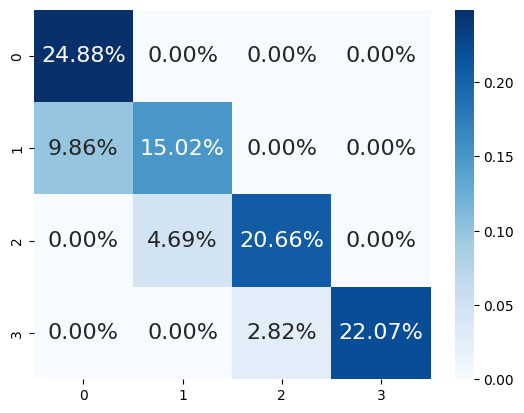

In [24]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

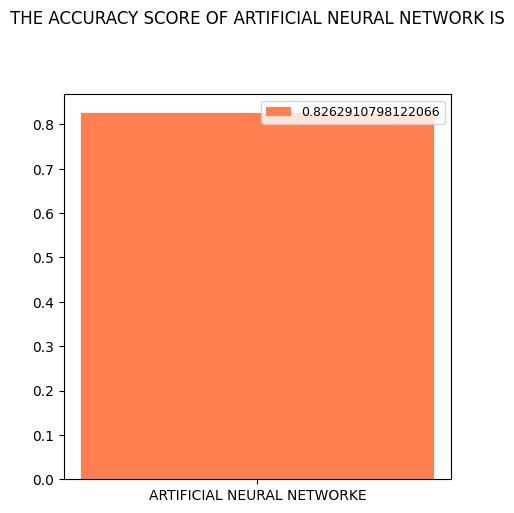

In [25]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="ARTIFICIAL NEURAL NETWORKE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("coral"))
    plt.title("THE ACCURACY SCORE OF ARTIFICIAL NEURAL NETWORK IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [26]:
model.save("MODEL.h5")